In [1]:
import cv2
import numpy as np
import scipy.linalg as la

# For profiling, not required in general.
import cProfile

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [28]:
import plotnine as pn

In [33]:
vc = cv2.VideoCapture("video/2021-09-16_16-16-44.mp4")
ret, ez_frame = vc.read()
vc.set(cv2.CAP_PROP_POS_FRAMES, 350)
ret, a22_frame = vc.read()

In [48]:
vc.get(cv2.CAP_PROP_FOURCC)

828601953.0

In [4]:
def convert_to_black_white(frame, cutoff=550):
    """
    Convert a frame to black/white. 
    """
    summed_frame = frame.sum(axis=2)
    black_white_frame = np.where(summed_frame>cutoff, 255, 1)
    
    return black_white_frame

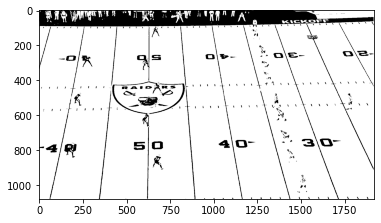

In [37]:
a22 = convert_to_black_white(a22_frame)
plt.imshow(a22, cmap="Greys")

a22_fft = np.fft.fft2(a22)
a22_fft = np.fft.fftshift(a22_fft)
a22_fft = np.abs(a22_fft) / np.mean(np.abs(a22_fft))

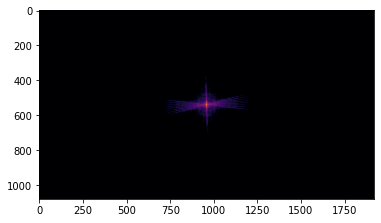

In [38]:
plt.imshow(a22_fft, norm=LogNorm(vmin=5), cmap="inferno")

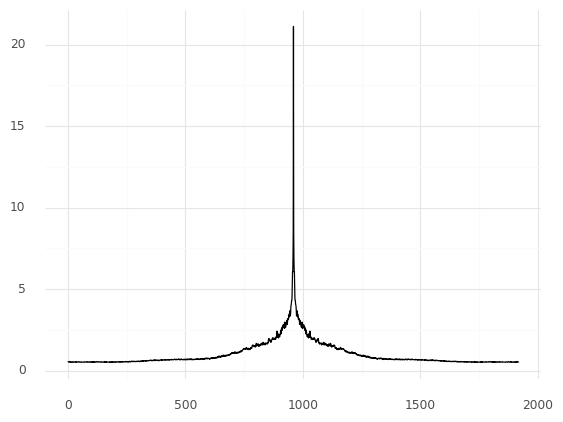

<ggplot: (136724577527)>

In [46]:
pos_means = np.mean(a22_fft, axis = 0)
pn.ggplot() + pn.geom_line(pn.aes(x = np.arange(0, 1920), y = pos_means)) + pn.theme_minimal()

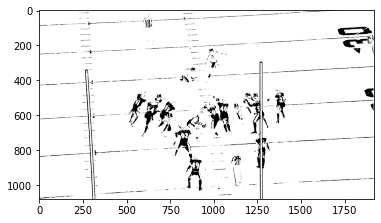

In [39]:
ez = convert_to_black_white(ez_frame)
plt.imshow(ez, cmap="Greys")

ez_fft = np.fft.fft2(ez)
ez_fft = np.fft.fftshift(ez_fft)
ez_fft = np.abs(ez_fft) / np.mean(np.abs(ez_fft))

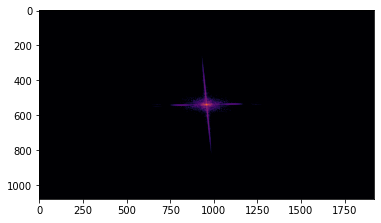

In [40]:
plt.imshow(ez_fft, norm=LogNorm(vmin=5), cmap="inferno")

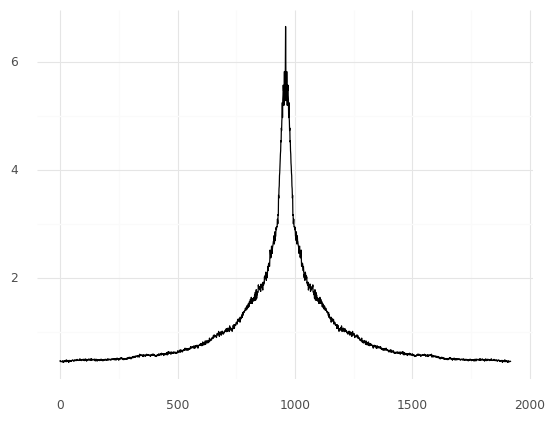

<ggplot: (136724576778)>

In [47]:
pos_means = np.mean(ez_fft, axis = 0)
pn.ggplot() + pn.geom_line(pn.aes(x = np.arange(0, 1920), y = pos_means)) + pn.theme_minimal()

In [31]:
pos_means.size

1080

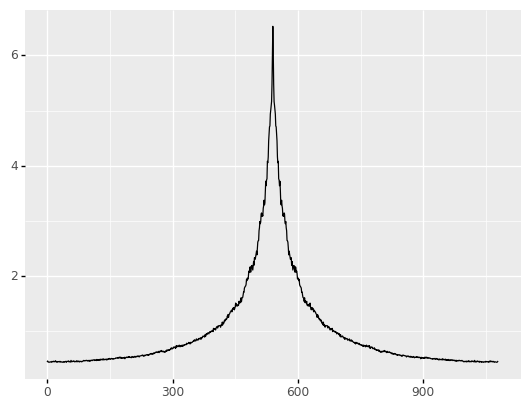

<ggplot: (136694317593)>

In [32]:
pn.ggplot() + pn.geom_line(pn.aes(x = np.arange(0, 1080), y = pos_means))

In [49]:
fourcc = cv2.VideoWriter_fourcc(*'X264')